In [15]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [87]:
data = pd.read_csv('master_conservation_projects_database.csv',encoding='mac_roman')

In [13]:
print('Shape of our data {}'.format(data.shape))

Shape of our data (84, 22)


In [22]:
data.describe(include='all')

,Organization,HQ,Year Established,Type of Organization,Size (AUM),AUM,Project Name,Financial Asset Class,Natural Asset Class,Returns Profile (Target IRR),...,Tree Species,Project City,Project State,Project Country,Latitude,Longitude,Project Description,Project Website,Contact,Approved
count,84,84,84.000000,84,84,84.000000,84,84,84,84,...,65,42,66,84,84.000000,84.000000,84,84,83,84
unique,18,11,NaN,13,19,NaN,73,11,6,16,...,36,31,35,29,NaN,NaN,74,40,19,1
top,Ecotrust Forest Management,USA,NaN,TIMO,USD 190 million AUM,NaN,MTO Group,"Equity, Grant, Loan",Forest,5.90%,...,Eucalyptus & Pine,Callam County,CA,USA,NaN,NaN,"MTO operates pine and eucalyptus plantations, ...",https://efmi.com/our-properties/,invest@efmi.com,True
freq,15,37,NaN,33,15,NaN,3,23,38,15,...,10,3,15,36,NaN,NaN,3,15,15,84
mean,NaN,NaN,2006.583333,NaN,NaN,893.084524,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.821929,-49.285689,NaN,NaN,NaN,NaN
std,NaN,NaN,9.799445,NaN,NaN,1430.100248,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,27.556200,77.333738,NaN,NaN,NaN,NaN
min,NaN,NaN,1982.000000,NaN,NaN,54.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-36.896529,-124.517829,NaN,NaN,NaN,NaN
25%,NaN,NaN,2004.000000,NaN,NaN,190.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-6.618445,-121.712307,NaN,NaN,NaN,NaN
50%,NaN,NaN,2006.000000,NaN,NaN,300.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.212073,-76.997422,NaN,NaN,NaN,NaN
75%,NaN,NaN,2015.000000,NaN,NaN,582.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,40.648396,21.338015,NaN,NaN,NaN,NaN


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Organization                  84 non-null     object 
 1   HQ                            84 non-null     object 
 2   Year Established              84 non-null     int64  
 3   Type of Organization          84 non-null     object 
 4   Size (AUM)                    84 non-null     object 
 5   AUM                           84 non-null     float64
 6   Project Name                  84 non-null     object 
 7   Financial Asset Class         84 non-null     object 
 8   Natural Asset Class           84 non-null     object 
 9   Returns Profile (Target IRR)  84 non-null     object 
 10  Sustainability Profile        84 non-null     object 
 11  Project Size (hectares)       74 non-null     object 
 12  Tree Species                  65 non-null     object 
 13  Project

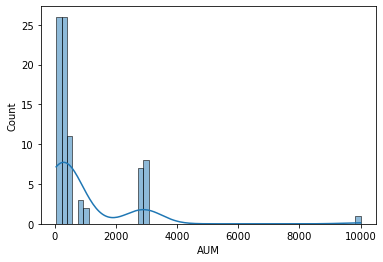

In [37]:
sns.histplot(data.AUM, kde=True)
plt.show()

<AxesSubplot:xlabel='AUM', ylabel='Year Established'>

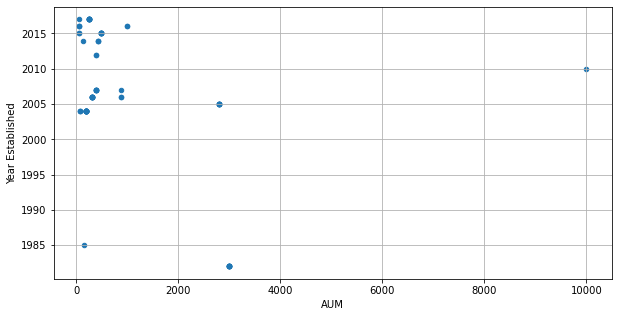

In [56]:
# data[-15:].plot(x='Year Established', y=['Project Size (hectares)', 'AUM'], figsize=(10,5), grid=True)
data.plot.scatter(x='AUM', y = 'Year Established', figsize=(10,5), grid=True)


In [47]:
data.AUM.describe()

count       84.000000
mean       893.084524
std       1430.100248
min         54.000000
25%        190.000000
50%        300.000000
75%        582.000000
max      10000.000000
Name: AUM, dtype: float64

In [53]:
for x in range(81, 101 , 1):
    print("{}% of AUM are less than equal to {}".format(x, data.AUM.quantile(x/100)))
iqr = data.AUM.quantile(0.75) - data.AUM.quantile(0.25) # To get the inter quantile range. (75% - 25%)
print('IQR {}'.format(iqr))

81% of AUM are less than equal to 1414.0000000000073
82% of AUM are less than equal to 2800.0
83% of AUM are less than equal to 2800.0
84% of AUM are less than equal to 2800.0
85% of AUM are less than equal to 2800.0
86% of AUM are less than equal to 2800.0
87% of AUM are less than equal to 2800.0
88% of AUM are less than equal to 2800.0
89% of AUM are less than equal to 2800.0
90% of AUM are less than equal to 2940.000000000001
91% of AUM are less than equal to 3000.0
92% of AUM are less than equal to 3000.0
93% of AUM are less than equal to 3000.0
94% of AUM are less than equal to 3000.0
95% of AUM are less than equal to 3000.0
96% of AUM are less than equal to 3000.0
97% of AUM are less than equal to 3000.0
98% of AUM are less than equal to 3000.0
99% of AUM are less than equal to 4190.000000000012
100% of AUM are less than equal to 10000.0
IQR 392.0


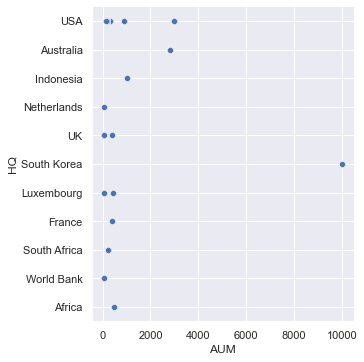

In [88]:
sns.set(style="darkgrid")
sns.relplot(x="AUM", y="HQ", data=data);

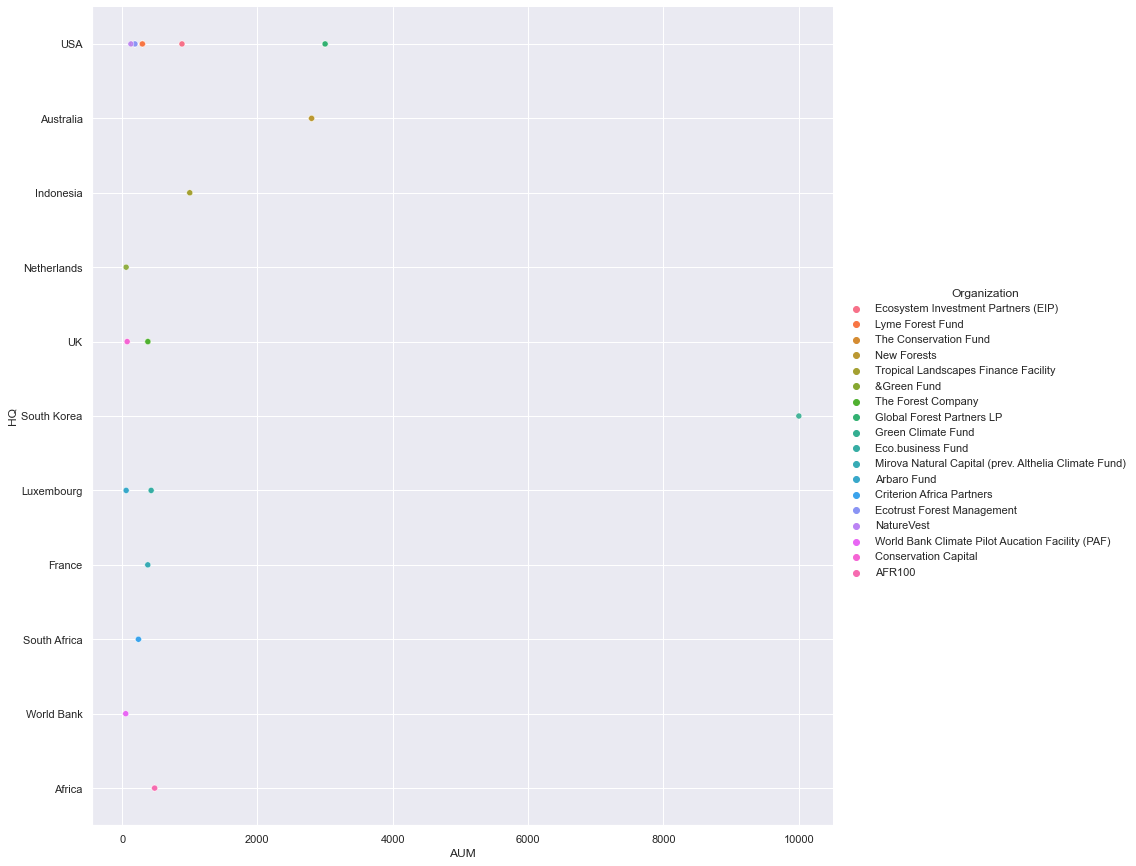

In [126]:
sns.relplot(x="AUM", y="HQ", hue="Organization",height=12,alpha=.9, data=data)

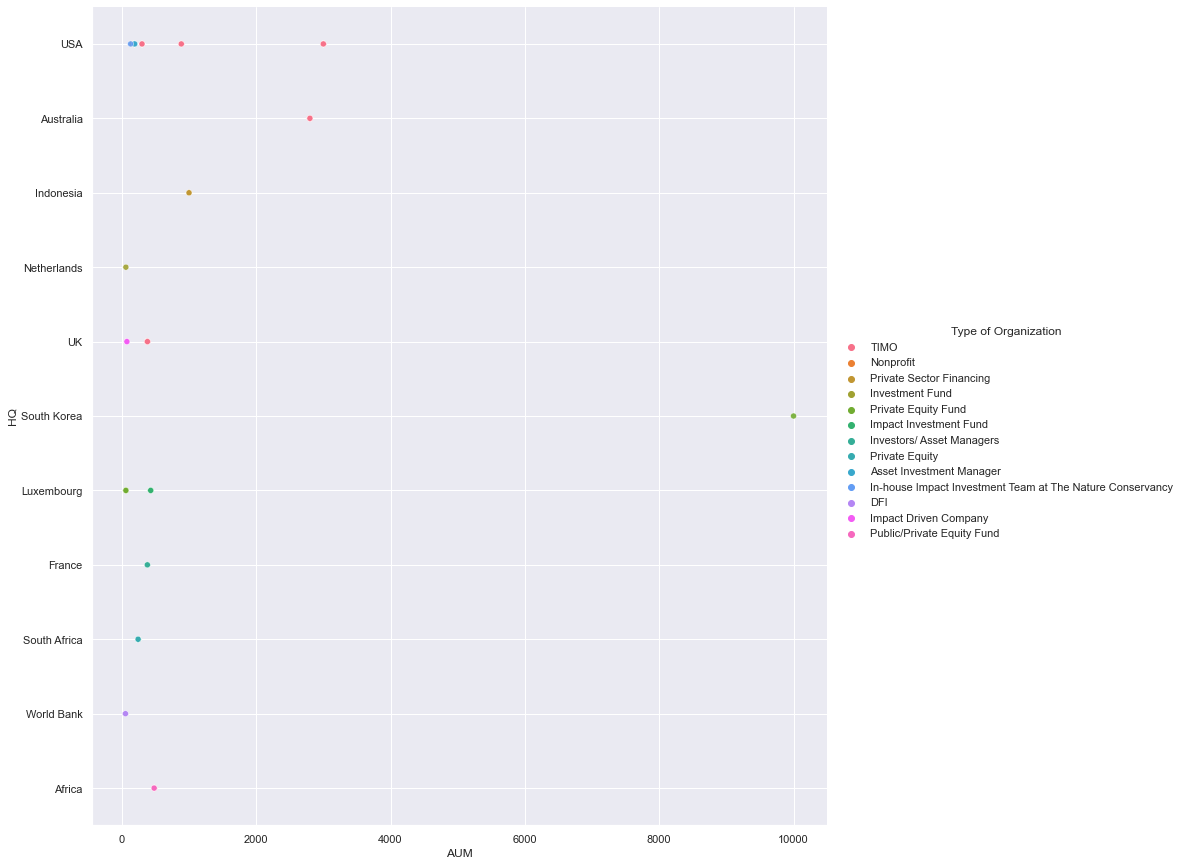

In [131]:
sns.relplot(x="AUM", y="HQ", hue="Type of Organization",height=12,alpha=.9, data=data)

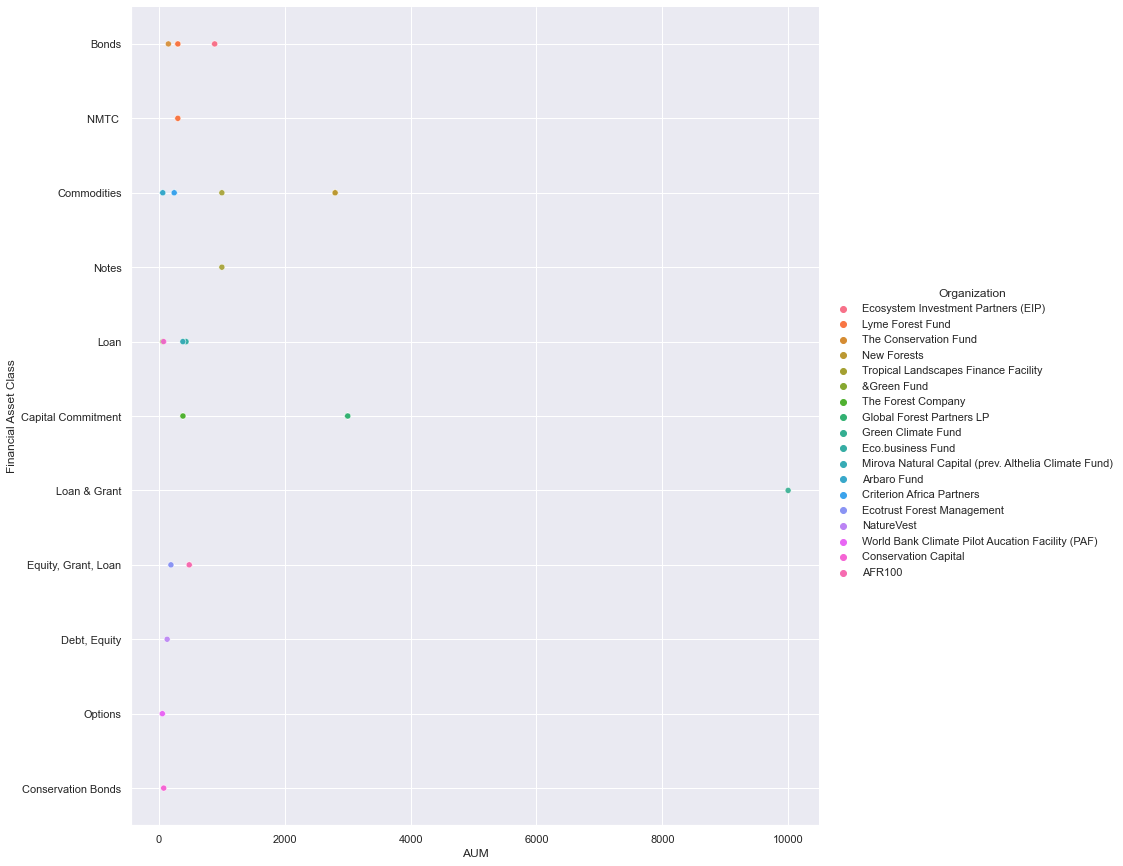

In [130]:
sns.relplot(x="AUM", y="Financial Asset Class", hue="Organization",height=12,alpha=.9, data=data)

In [88]:
data['Project Size (hectares)'].fillna('10,000', inplace=True)

In [2]:
!pip install geopy

In [6]:
# import module
from geopy.geocoders import Nominatim
  
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
  
# Latitude & Longitude input
Latitude = "2.269494556"
Longitude = "-72.75852614"
  
location = geolocator.reverse(Latitude+","+Longitude)
  
address = location.raw['address']
  
# traverse the data
city = address.get('city', '')
state = address.get('state', '')
country = address.get('country', '')
code = address.get('country_code')
zipcode = address.get('postcode')
print('City : ', city)
print('State : ', state)
print('Country : ', country)
print('Zip Code : ', zipcode)

City :  
State :  Guaviare
Country :  Colombia
Zip Code :  None


In [89]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [90]:
def set_state(x):
    
    if str(x['Project State']) == 'nan':
        
        Latitude = str(x['Latitude'])
        Longitude = str(x['Longitude'])

        location = geolocator.reverse(Latitude+","+Longitude)

        if "state" in location.raw['address'].keys():
            state = location.raw['address']['state']
            
        elif "region" in location.raw['address'].keys():
            state = location.raw['address']['region']
        
        elif "territory" in location.raw['address'].keys():
            state = location.raw['address']['territory']
        
        else:    
            return np.nan

        # just the american ones have the abbreviation
        if state in us_state_abbrev:
            return us_state_abbrev[state]
        else:
            return state
    
    else:
        return x['Project State']

In [91]:
def set_city(x):
    
    if str(x['Project City']).lower() == 'nan':
        
        Latitude = str(x['Latitude'])
        Longitude = str(x['Longitude'])

        location = geolocator.reverse(Latitude+","+Longitude)

        # there are several combinations
        
        if "town" in location.raw['address'].keys():
            return location.raw['address']['town']
        
        elif "city" in location.raw['address'].keys():
            return location.raw['address']['city']
        
        elif "county" in location.raw['address'].keys():
            return location.raw['address']['county']
        
        elif "village" in location.raw['address'].keys():
            return location.raw['address']['village']
        
        elif "suburb" in location.raw['address'].keys():
            return location.raw['address']['suburb']
        
        elif "state_district" in location.raw['address'].keys():
            return location.raw['address']['state_district']
        
        else:
            return np.nan
    
    else:
        return x['Project City']

In [92]:
df_cleaned = data.copy()
df_cleaned['Project State'] = data.apply(lambda x : set_state(x), axis=1)
df_cleaned['Project City'] = data.apply(lambda x : set_city(x), axis=1)

In [93]:
df_cleaned.isnull().sum()[['Project City','Project State']]

Project City     3
Project State    0
dtype: int64

In [94]:
df_cleaned.at[21,'Project City'] = "Samraong"
df_cleaned.at[34,'Project City'] = "Bengalon"
df_cleaned.at[83,'Project City'] = "Luwanda"

In [95]:
df_cleaned.isnull().sum()[['Project City','Project State']]

Project City     0
Project State    0
dtype: int64

In [96]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Organization                  84 non-null     object 
 1   HQ                            84 non-null     object 
 2   Year Established              84 non-null     int64  
 3   Type of Organization          84 non-null     object 
 4   Size (AUM)                    84 non-null     object 
 5   AUM                           84 non-null     float64
 6   Project Name                  84 non-null     object 
 7   Financial Asset Class         84 non-null     object 
 8   Natural Asset Class           84 non-null     object 
 9   Returns Profile (Target IRR)  84 non-null     object 
 10  Sustainability Profile        84 non-null     object 
 11  Project Size (hectares)       84 non-null     object 
 12  Tree Species                  65 non-null     object 
 13  Project

In [44]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=7fa914456fb9e42a89b8053b6f2a5fcff2164ab2200c626cca1496f58a161e41
  Stored in directory: c:\users\nisarg mehta\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [97]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [108]:
fig = px.box(data, y='AUM')
fig.show()

In [79]:
trace = go.Bar(
    # x=data['Organization'].unique(),
    x=data['Organization'],
    y=data['AUM']
#     name='Number of games released'
)

# Define the data array
data1 = [trace]

# Set the title
layout = {'title': 'Comparision'}

# Create a Figure and plot it
fig = go.Figure(data=data1, layout=layout)
iplot(fig, show_link=False)

In [126]:
# Create a line (trace) for the number of games released
# trace0 = go.Bar(
#     x=data['Organization'],
#     y=data['AUM']
# )
trace1 = go.Bar(
    x=data['Year Established'],
    y=data['AUM'],
)

# Define the data array
data1 = [trace1]

# Set the title
layout = {'title': 'Comparision'}

# Create a Figure and plot it
fig = go.Figure(data=data1, layout=layout)
iplot(fig, show_link=True)

In [109]:
fig = px.pie(data, values='AUM', names='Type of Organization', title='Type of Organization vs AUM')
fig.show()

In [157]:
fig = px.box(data, x='Type of Organization', y='AUM')
fig.show()

In [121]:
fig = px.histogram(data, x="Financial Asset Class", y="AUM", marginal="rug",color ="Organization")
fig.show()

In [129]:
fig = px.histogram(data, x="Financial Asset Class", y="AUM", marginal="box",color ="Type of Organization")
fig.show()

In [134]:
fig = px.histogram(data, x="Returns Profile (Target IRR)", y="AUM", marginal="rug",color ="Type of Organization")
fig.show()

In [138]:
fig = px.pie(data, values='AUM', names='Returns Profile (Target IRR)', title='Returns Profile (Target IRR) vs AUM')
fig.show()

In [140]:
fig = px.density_heatmap(data, x="Natural Asset Class", y="AUM", marginal_x="histogram", marginal_y="histogram")
fig.show()

In [143]:
fig = px.histogram(data, x="Natural Asset Class", y="AUM", marginal="rug",color ="Organization")
fig.show()

In [144]:
fig = px.histogram(data, x="Natural Asset Class", y="AUM", marginal="rug",color ="Type of Organization")
fig.show()

In [153]:
fig = px.histogram(data, x="Project Size (hectares)", y="AUM", marginal="rug",color ="Type of Organization")
fig.show()

In [154]:
fig = px.histogram(data, x="Project Size (hectares)", y="AUM", marginal="rug",color ="HQ")
fig.show()

In [155]:
fig = px.density_heatmap(data, x="Project State", y="AUM", marginal_x="histogram", marginal_y="histogram")
fig.show()

In [158]:
fig = px.box(data, x='Project State', y='AUM')
fig.show()

In [165]:
fig = px.histogram(data, x="Project State", y="AUM", marginal="rug",color ="Type of Organization")
fig.show()

In [161]:
fig = px.pie(data, values='AUM', names='Project Country', title='Project Country vs AUM')
fig.show()

In [166]:
fig = px.density_heatmap(data, x="Project Country", y="AUM", marginal_x="histogram", marginal_y="histogram")
fig.show()

In [168]:
fig = px.histogram(data, x="Project Country", y="AUM", marginal="rug",color ="Organization")
fig.show()

In [172]:
fig = px.histogram(data, x="Project Country", y="AUM", marginal="rug",color ="HQ")
fig.show()